In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_51980_U')

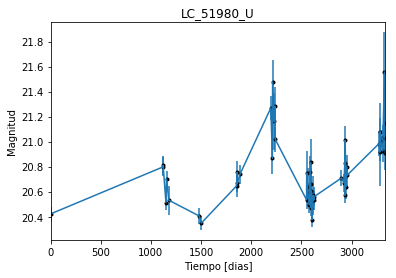

In [2]:
data = np.genfromtxt('LC_51980_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_51980_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

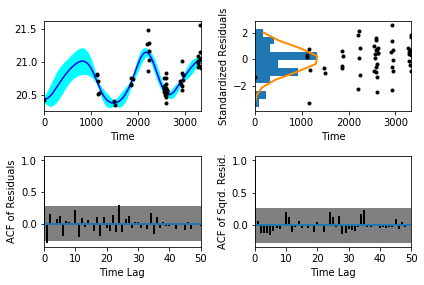

In [5]:
sample.assess_fit()

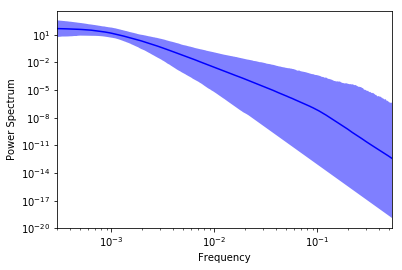

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_51980_U')

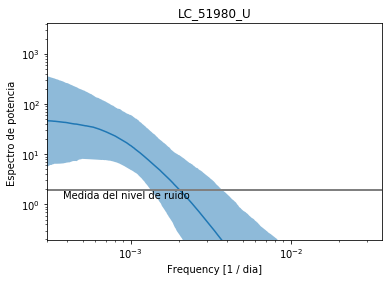

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_51980_U')

Text(0.5,1,'Prediccion , valor esperado LC_51980_U')

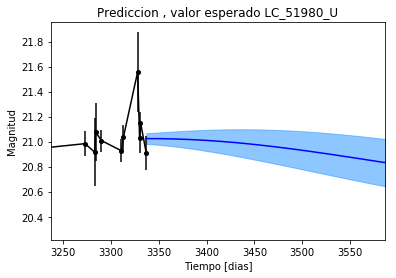

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_51980_U')

Text(0.5,1,'Prediccion, Caminos simulados LC_51980_U')

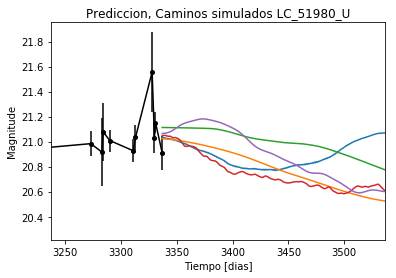

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_51980_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_51980_U')

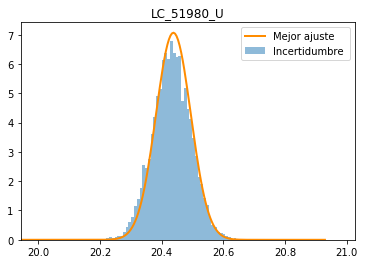

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_51980_U')

Text(0.5,1,'Interpolacion, camino simulado LC_51980_U')

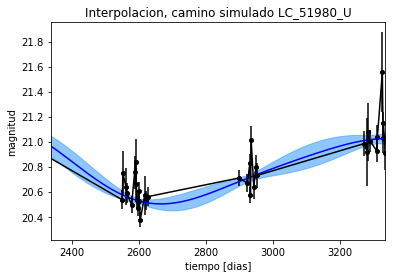

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51980_U')

Text(0.5,1,'Interpolacion, camino simulado LC_51980_U')

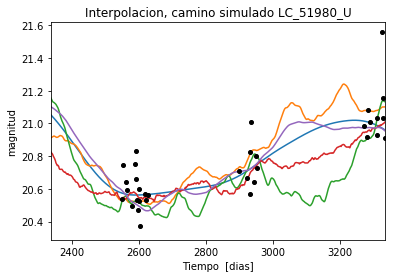

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51980_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 279.808848418
Median: 0.00436168418946
Standard deviation: 0.17766050032
68% credibility interval: [ 0.00050641  0.12258365]
95% credibility interval: [  3.23949611e-04   7.03652469e-01]
99% credibility interval: [  3.04016865e-04   9.89076986e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 405.208580261
Median: 0.00108925568765
Standard deviation: 0.0790759253519
68% credibility interval: [ 0.00041087  0.01719404]
95% credibility interval: [ 0.0003148   0.21004941]
99% credibility interval: [  3.03753732e-04   5.60025865e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 364.61874917
Median: 0.00644608126888
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 525.81742729
Median: 41.4114321106
Standard deviation: 1.71859547738
68% credibility interval: [ 39.66123531  42.80126844]
95% credibility interval: [ 37.18738652  44.02725809]
99% credibility interval: [ 35.09296786  44.53750621]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 614.011164859
Median: 0.457491709011
Standard deviation: 2.02080210156
68% credibility interval: [ 0.0359511   3.29087212]
95% credibility interval: [ 0.01176887  6.81191582]
99% credibility interval: [  8.81933332e-03   9.51876758e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 500.103930999
Median: 0.178315865705
Standard deviation: 8.1593397629
68% credibility interval: [  5.12574166e-03   5.39945322e+00]
95% credibility interva

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10010.6517821
Median: 2.97111520297e-31
Standard deviation: 9.70033159263e+33
68% credibility interval: [  2.20836712e-60   3.87508329e-02]
95% credibility interval: [  2.30394829e-97   7.70775595e+18]
99% credibility interval: [  1.73459274e-114   6.32319940e+030]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3915.3568244
Median: 20.7194611049
Standard deviation: 0.174711195299
68% credibility interval: [ 20.58660543  20.84747935]
95% credibility interval: [ 20.38698164  21.07595394]
99% credibility interval: [ 20.09832483  21.34849718]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 418.348547208
Median: 0.00109615150491
Standard deviation: 0.226757056514
68% credibility interval: [ 0.          0.25937768]
95% credibility interval: [ 0.          0.85273685]
99% credibility interval: [ 0.          1.02044404]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 418.348547208
Median: 0.00109615150491
Standard deviation: 0.226757056514
68% credibility interval: [ 0.          0.25937768]
95% credibility interval: [ 0.          0.85273685]
99% credibility interval: [ 0.          1.02044404]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 404.778312992
Median: 0.0
Standard deviation: 0.000434109209634
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 525.81742729
Median: 41.4114321106
Standard deviation: 1.71859547738
68% credibility interval: [ 39.66123531  42.80126844]
95% credibility interval: [ 37.18738652  44.02725809]
99% credibility interval: [ 35.09296786  44.53750621]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1973.03402975
Median: 0.099433517514
Standard deviation: 0.165582084532
68% credibility interval: [ 0.05387181  0.20577677]
95% credibility interval: [ 0.03356651  0.56618928]
99% credibility interval: [ 0.0258359   1.03207669]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2122.40538578
Median: 1.23185388651
Standard deviation: 0.186500648019
68% credibility interval: [ 1.06116838  1.43306768]
95% credibility interval: [ 0.92964712  1.65811936]
99% credibility interval: [ 0.84507282  1.81123085]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 5731.14940343
Median: 4.60492449229e-05
Standard deviation: 0.0438162293724
68% credibility interval: [  4.06874963e-07   2.19605598e-03]
95% credibility interval: [  6.21762089e-23   2.26176522e-02]
99% credibility interval: [  5.46735989e-35   2.09438344e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 279.808848418
Median: (-0.0274052700137-4.98792473253j)
Standard deviation: 1.80997201177
68% credibility interval: [-0.77021579+0.j         -0.00318187-0.00566208j]
95% credibility interval: [ -4.42117885e+00-3.00607355j  -2.03543544e-03-0.04032331j]
99% credibility interval: [ -6.21455399e+00 -5.55457635e+00j  -1.91019430e-03 -4.10022237e-03j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 405.208580261
Median: (-0.00684399533241+2.52276500077j)
Standard deviation: 1.50890357836
68% credibility interval: [-0.10803336+1.94417316j -0.00258155+0.j        ]
95% credibility interval: [-1.31977937+2.37034197j -0.00197794+0.j        ]
99% credibility interval: [ -3.51874629e+00+3.26510796j  -1.90854098e-03+0.00527552j]
Pos